In [1]:
"""
Created By:           John F.     
Student Number:       x19141301 
Student Email:        x19141301@student.ncirl.ie 
Created On:           02/12/2021 
Last Modified:        30/12/2021  
Data Source:          https://www.kaggle.com/imdevskp/corona-virus-report?select=worldometer_data.csv
Description:
This program is to read data from a CSV file, 
check for any null/empty values and fill them
then to standardize the data for plotting and 
predicting. 
"""

"""
Resources Used: 
* https://stackoverflow.com/a/66908486
* https://www.geeksforgeeks.org/visualize-data-from-csv-file-in-python


* https://pythonprogramming.net/loading-file-data-matplotlib-tutorial/
* https://www.kite.com/python/answers/how-to-plot-data-from-a-csv-file-in-python
* https://stackoverflow.com/questions/63040250/how-to-make-a-graph-plotting-monthly-data-over-many-years-in-pandas

"""

'\nResources Used: \n* https://stackoverflow.com/a/66908486\n* https://www.geeksforgeeks.org/visualize-data-from-csv-file-in-python\n\n\n* https://pythonprogramming.net/loading-file-data-matplotlib-tutorial/\n* https://www.kite.com/python/answers/how-to-plot-data-from-a-csv-file-in-python\n* https://stackoverflow.com/questions/63040250/how-to-make-a-graph-plotting-monthly-data-over-many-years-in-pandas\n\n'

In [2]:
# IMPORT LIST #
import pandas as pd                                   
from pandas import DataFrame                          
import matplotlib.pyplot as plt                       
import numpy as np                                    
from sklearn.preprocessing import StandardScaler      
from sklearn import preprocessing                     
from sklearn.datasets import make_blobs               
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_learning_curves
import random
from sklearn.ensemble._forest import RandomForestClassifier
import seaborn as sns
import sklearn.metrics as metricss
from sklearn.metrics import r2_score

#################################
# DATA #
#################################
# Resource used for panda and dataframe: https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58 #
data = pd.read_csv('dataset/covid_19_clean_complete.csv')
# Replace missing values with 0 values - Resource used: https://stackoverflow.com/a/44559011 #
data.replace(np.nan, 0, inplace=True)
# Columns #
columns = ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']

# Dataframe the data #
df = pd.DataFrame(data, columns=columns)
#check for null values #
print(df.isnull().sum())
# Show the data #
df.head()

Date         0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-22,0,0,0,0
2,2020-01-22,0,0,0,0
3,2020-01-22,0,0,0,0
4,2020-01-22,0,0,0,0


In [2]:
# Describe the dataframe #
df.describe()

,Confirmed,Deaths,Recovered,Active
count,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [3]:
#################################
# Categorical Data #
#################################

# Resource with help with LE: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html #
le = preprocessing.LabelEncoder()
le.fit([1])
df['Confirmed']=le.fit_transform(df['Confirmed'])


In [4]:
#################################
# STANDARDIZE THE DATA #
#################################
#list for cols to scale
columns_to_scale = ['Confirmed','Deaths', 'Recovered', 'Active']
# Create the Scaler object
scaler = StandardScaler()
# fit scaler #
scaler.fit(data[columns_to_scale])
# Fit confirmed and death cases to the scaler object #
scaled_data = scaler.transform(data[columns_to_scale])
scaled_DF = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_DF.head()
scaled_DF.describe()

,Confirmed,Deaths,Recovered,Active
count,4.906800e+04,4.906800e+04,4.906800e+04,4.906800e+04
mean,9.094681e-15,2.133379e-14,1.121670e-14,2.618173e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.326398e-01,-1.400454e-01,-1.444464e-01,-1.062052e-01
25%,-1.326084e-01,-1.400454e-01,-1.444464e-01,-1.060216e-01
50%,-1.313201e-01,-1.397286e-01,-1.439172e-01,-1.056807e-01
75%,-1.207132e-01,-1.352936e-01,-1.322932e-01,-9.807495e-02
max,3.356961e+01,2.330345e+01,3.355316e+01,3.682701e+01


<AxesSubplot:>

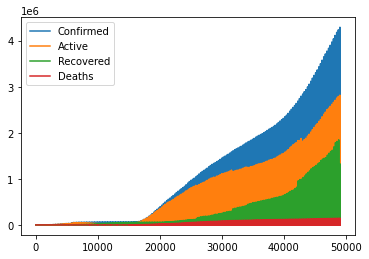

In [5]:
#################################
# PLOT THE DATA:  Line chart #
#################################
# Source used: https://pythonprogramming.net/2D-Visualization-of-Pandas-data-with-Matplotlib-including-plotting-dates/ 
df = data
df[['Confirmed','Active', 'Recovered', 'Deaths']].plot()

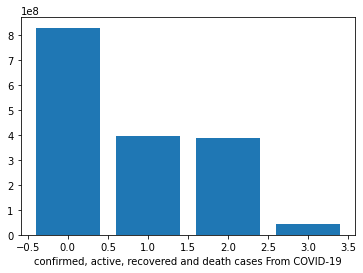

In [6]:
#################################
# PLOT THE DATA: Histogram  #
#################################
# Create the dataframe for the histogram #
histo = pd.DataFrame(data, columns=['Confirmed', 'Active', 'Recovered', 'Deaths'])
# Add up all confirmed and death cases #
totalCases = histo['Confirmed'].sum()
activeCases = histo['Active'].sum()
recoveredCases = histo['Recovered'].sum()
totalDeaths = histo['Deaths'].sum()
# Plot the data in the histogram and show #
plt.bar([0, 1, 2, 3], [totalCases, activeCases, recoveredCases, totalDeaths])
plt.xlabel('confirmed, active, recovered and death cases From COVID-19')
plt.show()

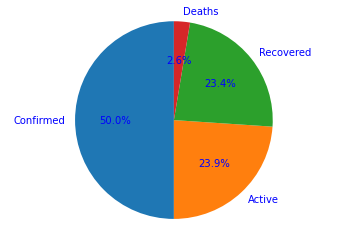

In [7]:
#################################
# PLOT THE DATA: Pie chart  #
#################################

# Resource used for pie-chart: https://stackoverflow.com/a/62594058 #
# Resource used for pie-chart: http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php #
# Create a dictionary #
pieData = {'Confirmed': df['Confirmed'].sum(), 
           'Active': df['Active'].sum(),
           'Recovered': df['Recovered'].sum(),
           'Deaths': df['Deaths'].sum()
          }
# Create array #
labels = []
values = []
# For loop to append items to the array #
for x, y in pieData.items():
    labels.append(x)
    values.append(y)
    
# Plot #
# Source used for white text: https://stackoverflow.com/a/54149203 #
plt.pie(values, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'color':"b"})
# Plot the data #
plt.axis('equal')
plt.show()

In [8]:
#################################
# Training and Test Data  #
#################################
# Source used: https://realpython.com/linear-regression-in-python/
# Source used: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Store the data for x and y #
x = data[['Confirmed', 'Deaths']]
y = data['Active']
# Split #
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Create linear regression object
model = LinearRegression()
model.fit(x_train, y_train)

# Source: https://datatofish.com/line-chart-python-matplotlib/ #
predictions = model.predict(x_test)


Text(0.5, 1.0, 'Linear Regression Predictions:')

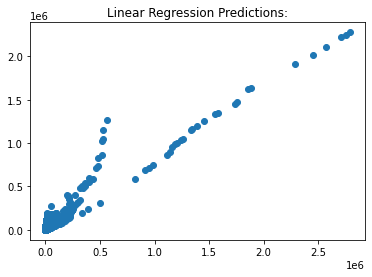

In [9]:
#################################
# Plot the prediction  #
#################################
# PLOT THE PREDICTION IN A SCATTER DIAGRAM #
plt.scatter(y_test, predictions)
plt.title('Linear Regression Predictions:')


(array([2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 1.140e+02, 1.454e+04,
        2.900e+01, 2.100e+01, 3.000e+00, 5.000e+00]),
 array([-703685.30755845, -582230.89078032, -460776.47400219,
        -339322.05722407, -217867.64044594,  -96413.22366781,
          25041.19311031,  146495.60988844,  267950.02666657,
         389404.44344469,  510858.86022282]),
 <BarContainer object of 10 artists>)

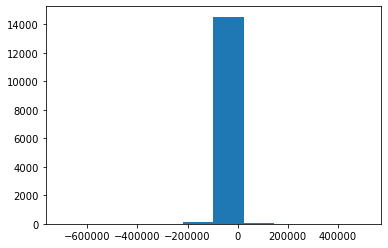

In [10]:
#################################
# Plot a histogram  #
#################################
plt.hist(y_test - predictions)

In [14]:
#################################
# Plot a dataframe  #
#################################
# Source used: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html #
from sklearn.metrics import r2_score


dic = {
    'Coefficients:': model.coef_, 
    'Mean Absolute Error:': metrics.mean_absolute_error(y_test, predictions),
    'Mean Squared Error:': metrics.mean_squared_error(y_test, predictions),
    'R-Squared': r2_score(y_test, predictions   )
}
#Store values in a df and print #
lrPD = DataFrame.from_dict(dic)
print(lrPD)


   Coefficients:  Mean Absolute Error:  Mean Squared Error:  R-Squared
0       0.464076           4850.035932         4.860681e+08   0.918315
1       2.144425           4850.035932         4.860681e+08   0.918315


In [12]:
#################################
# Dataset #2: Heart Disease  #
#################################
# Data source: https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset #
heartData = pd.read_csv('dataset/heart_disease_health_indicators_BRFSS2015.csv')



In [4]:
#################################
# STANDARDIZE THE DATA #
#################################
#list for cols to scale
columns_to_scale = ['HeartDiseaseorAttack','HighChol', 'Stroke', 'Smoker', 'Diabetes']
# Create the Scaler object
scaler = StandardScaler()
# fit scaler #
scaler.fit(heartData[columns_to_scale])
# Fit confirmed and death cases to the scaler object #
scaled_data = scaler.transform(heartData[columns_to_scale])
scaled_DF = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_DF.head()
scaled_DF.describe()




,HeartDiseaseorAttack,HighChol,Stroke,Smoker,Diabetes
count,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05
mean,-8.808645e-15,-1.106757e-14,1.325996e-14,6.702429e-15,-1.978033e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.224576e-01,-8.581816e-01,-2.056365e-01,-8.921186e-01,-4.252922e-01
25%,-3.224576e-01,-8.581816e-01,-2.056365e-01,-8.921186e-01,-4.252922e-01
50%,-3.224576e-01,-8.581816e-01,-2.056365e-01,-8.921186e-01,-4.252922e-01
75%,-3.224576e-01,1.165254e+00,-2.056365e-01,1.120927e+00,-4.252922e-01
max,3.101183e+00,1.165254e+00,4.862949e+00,1.120927e+00,2.439387e+00


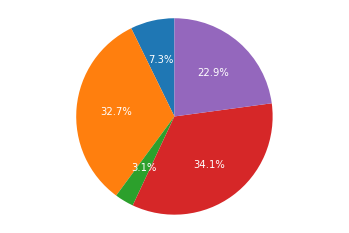

In [5]:
#################################
# PIE CHART #
#################################
pieData = {'Heart Disease or Attack': heartData['HeartDiseaseorAttack'].sum(), 
           'High Chol': heartData['HighChol'].sum(),
           'Stroke': heartData['Stroke'].sum(),
           'Smoker': heartData['Smoker'].sum(),
           'Diabetes':heartData['Diabetes'].sum()
          }
# Create array #
labels = []
values = []
# For loop to append items to the array #
for x, y in pieData.items():
    labels.append(x)
    values.append(y)
    
# Plot #
# Source used for white text: https://stackoverflow.com/a/54149203 #
plt.pie(values, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'color':"w"})
# Plot the data #
plt.axis('equal')
plt.show()

In [6]:
#################################
# KNN #
#################################
# Source used: https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/ #
"""
Store data in X and Y, X being the heart disease or heart attack 
and Y being a stroke
"""
X = heartData[['HeartDiseaseorAttack']]
y = heartData['Stroke']
# Split the X and Y into training and testing #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
# Source used for loop: https://www.w3schools.com/python/python_for_loops.asp #
# https://www.tutorialspoint.com/python/python_loop_control.htm
"""
Loop through a range of 10 loops, 
if the i value contains, 0 then continue
to the next loop which creates the KNN algorithm
fits and trains it and prints out multiple ranges of KNN
"""
for i in range(10):
    if i == 0:
        continue
    else:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        print('KNN Score #', i, '= ', knn.score(X_test, y_test)) 

KNN Score # 1 =  0.8948938294964786
KNN Score # 2 =  0.9598312835067802
KNN Score # 3 =  0.8948938294964786
KNN Score # 4 =  0.9598312835067802
KNN Score # 5 =  0.8948938294964786
KNN Score # 6 =  0.9598312835067802
KNN Score # 7 =  0.9598312835067802
KNN Score # 8 =  0.9598312835067802
KNN Score # 9 =  0.9598312835067802


In [8]:
#################################
# Logistic Regression #
#################################
"""
Source/s used:
http://blairhudson.com/blog/posts/introduction-to-classification-using-logistic-regression-with-scikit-learn/
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
"""
X = heartData[['HeartDiseaseorAttack']]
y = heartData['Stroke']
# Split the X and Y into training and testing #
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size = 0.25, random_state=0)

# Declare log' reg' #
log_reg = LogisticRegression()
# fit the model #
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
# Get some predictions #
prediction = log_reg.predict(X_train)
# Print a prediction #
print(prediction)


[0. 0. 0. ... 0. 0. 0.]


In [62]:
#################################
# Plot a dataframe for Log Reg #
#################################
"""
NOTE:

I tried to get some stats for the log reg' but kept running into problems
"""
# Source used: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html # 
import sklearn.metrics as metrics


# Reshape the vars #
X.shape[0]
y.shape[0]

# Create some variables for measurement of 
#co = log_reg.coef_
#mae = metrics.mean_absolute_error(y_test, prediction)


#dic = {
 #   'Coefficients:': co, 
  #  'Mean Absolute Error:': metrics.mean_absolute_error(y_test[0], prediction),
   # 'Mean Squared Error:': metrics.mean_squared_error(y_test[0], prediction),
    #'R-Squared': r2_score(y_test[0], predictions   )
#}
#Store values in a df and print #
#lrPD = DataFrame.from_dict(dic)
#print(lrPD)





253680